<a href="https://colab.research.google.com/github/remanx2558/MIDBReviews/blob/master/FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: SEE SEMENTIC SIMALARITY BEETWEEN WORDS

FastText supports both Continuous Bag of Words and Skip-Gram models. Here I will implement the skip-gram model to learn vector representation of words from the Wikipedia articles on artificial intelligence, machine learning, deep learning, and neural networks. Since these topics are quite similar, I chose these topics to have a substantial amount of data to create a corpus. I can add more topics of the similar nature if I want.

As a first step, i need to import the required libraries. I will make use of the Wikipedia library for Python, which can be downloaded via the following command:

In [0]:
 pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=6f397a5b7c8d51ba8cfd34cf055bde5f620b30618de5033b742775c4f74b23de
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


 Gensim model for FastText : This model can run on Windows, however, for text classification, we will have to use Linux platform. We will see that in the next section.

In [0]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Scraping Wikipedia Articles

In this step,: scrape the required Wikipedia articles :

In [0]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [0]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

   



artificial intelligence advanced technology present


In [0]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [0]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 1min 14s, sys: 189 ms, total: 1min 14s
Wall time: 38.7 s


In [0]:
print(ft_model.wv['artificial'])

[-0.6629218   0.01485464  0.14321305  0.22388339  0.02050421 -0.4316767
  0.21158832  0.05712915  0.28034797  0.08504593 -0.01721529  0.06676719
 -0.05847127  0.33813384 -0.25903216  0.03818923 -0.03181555 -0.04983433
 -0.03819727  0.03630586  0.8180793   0.00117197  0.23343539  0.13325253
  0.5946695   0.35012928 -0.01725553  0.04843216  0.5824589   0.06362695
 -0.8870708   0.08401921  0.03855556 -0.27430525  0.18568075 -0.21159886
  0.0948806   0.46864074  0.5091831  -0.2301913  -0.15308683 -0.50416595
  0.29978427  0.19844466  0.2213223  -0.10571684 -0.0732915   0.28212425
 -0.07055888  0.18542342 -0.0853572   0.028009    0.03272703 -0.24227944
  0.24257883  0.14206022  0.19876844 -0.15619017 -0.15519024  0.14915769]


In [0]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'inspired', 'simulate', 'simulated', 'also']
intelligence:['artificial', 'simulate', 'simulated', 'philosophy', 'machine']
machine:['learning', 'ethic', 'concerned', 'intelligence', 'automated']
network:['neural', 'biological', 'recurrent', 'perceptrons', 'deep']
recurrent:['network', 'short', 'hopfield', 'neural', 'deep']
deep:['learning', 'convolutional', 'generative', 'speech', 'recurrent']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(ft_model.wv.similarity(w1='artificial', w2='intelligence'))

0.8591553


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', 'intelligence', 'inspired', 'simulate', 'simulated', 'also', 'intelligence', 'artificial', 'simulate', 'simulated', 'philosophy', 'machine', 'machine', 'learning', 'ethic', 'concerned', 'intelligence', 'automated', 'network', 'neural', 'biological', 'recurrent', 'perceptrons', 'deep', 'recurrent', 'network', 'short', 'hopfield', 'neural', 'deep', 'deep', 'learning', 'convolutional', 'generative', 'speech', 'recurrent']
<class 'list'>
36


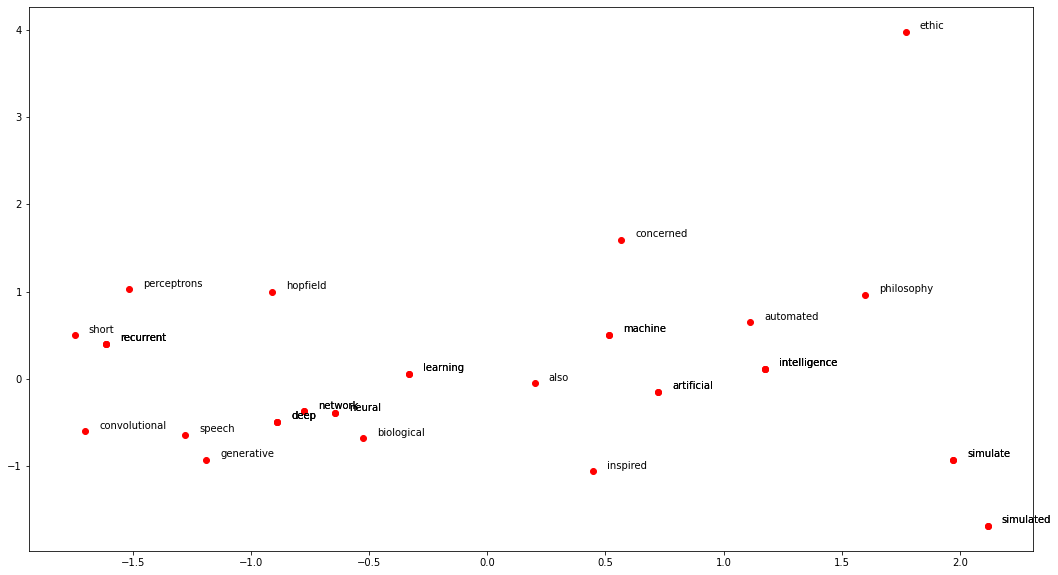

In [0]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

Article 5

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

yelp_reviews = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")
yelp_reviews.isnull().values.any()
yelp_reviews.sentiment= yelp_reviews.sentiment.fillna(0.0).astype(int)#this will conver float into int and also manage missing values


yelp_reviews.shape

(25005, 2)

In [0]:
import pandas as pd
df = pd.DataFrame(yelp_reviews)

def tran_mathscore(y):
    if y == 1 :
      return "positive"
    if y == 0 :
      return "negative"   

df['sentiment'] = df['sentiment'].apply(tran_mathscore)

In [0]:
!wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip


--2020-05-29 08:03:53--  https://github.com/facebookresearch/fastText/archive/v0.1.0.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0 [following]
--2020-05-29 08:03:53--  https://codeload.github.com/facebookresearch/fastText/zip/v0.1.0
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.1.0.zip’

v0.1.0.zip              [  <=>               ]  92.06K   361KB/s    in 0.3s    

2020-05-29 08:03:54 (361 KB/s) - ‘v0.1.0.zip’ saved [94267]



In [0]:
!unzip v0.1.0.zip

Archive:  v0.1.0.zip
431c9e2a9b5149369cc60fb9f5beba58dcf8ca17
   creating: fastText-0.1.0/
  inflating: fastText-0.1.0/.gitignore  
  inflating: fastText-0.1.0/CONTRIBUTING.md  
  inflating: fastText-0.1.0/LICENSE  
  inflating: fastText-0.1.0/Makefile  
  inflating: fastText-0.1.0/PATENTS  
  inflating: fastText-0.1.0/README.md  
  inflating: fastText-0.1.0/classification-example.sh  
  inflating: fastText-0.1.0/classification-results.sh  
  inflating: fastText-0.1.0/eval.py  
  inflating: fastText-0.1.0/get-wikimedia.sh  
  inflating: fastText-0.1.0/pretrained-vectors.md  
  inflating: fastText-0.1.0/quantization-example.sh  
  inflating: fastText-0.1.0/quantization-results.sh  
   creating: fastText-0.1.0/src/
  inflating: fastText-0.1.0/src/args.cc  
  inflating: fastText-0.1.0/src/args.h  
  inflating: fastText-0.1.0/src/dictionary.cc  
  inflating: fastText-0.1.0/src/dictionary.h  
  inflating: fastText-0.1.0/src/fasttext.cc  
  inflating: fastText-0.1.0/src/fasttext.h  
  inflat

In [0]:
cd /content/fastText-0.1.0/


/content/fastText-0.1.0


In [0]:
!make

c++ -pthread -std=c++0x -O3 -funroll-loops -c src/args.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/dictionary.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/productquantizer.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/matrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/qmatrix.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/vector.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/model.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/utils.cc
c++ -pthread -std=c++0x -O3 -funroll-loops -c src/fasttext.cc
c++ -pthread -std=c++0x -O3 -funroll-loops args.o dictionary.o productquantizer.o matrix.o qmatrix.o vector.o model.o utils.o fasttext.o src/main.cc -o fasttext


In [0]:
!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [0]:
#_label_tag This is sentence 1
#_label_tag2 This is sentence 2.
#__label__positive burgers are very big portions here.


In [0]:
import pandas as pd
from io import StringIO
import csv

col = ['sentiment', 'text']

yelp_reviews = yelp_reviews[col]

import pandas as pd
from io import StringIO
import csv

col = ['sentiment', 'text']

yelp_reviews = yelp_reviews[col]
yelp_reviews['sentiment']=['__label__'+ s for s in yelp_reviews['sentiment']]
yelp_reviews['text']= yelp_reviews['text'].replace('\n',' ', regex=True).replace('\t',' ', regex=True)
yelp_reviews.to_csv(r"/content/drive/My Drive/malia/yelp_reviews_updated.txt", index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [0]:
yelp_reviews.head()


,sentiment,text
0,__label__negative,For a movie that gets no respect there sure ar...
1,__label__negative,Bizarre horror movie filled with famous faces ...
2,__label__negative,"A solid, if unremarkable film. Matthau, as Ein..."
3,__label__negative,It's a strange feeling to sit alone in a theat...
4,__label__negative,"You probably all already know this by now, but..."


In [0]:
yelp_reviews.tail()


,sentiment,text
25000,__label__positive,"My comments may be a bit of a spoiler, for wha..."
25001,__label__positive,"The ""saucy"" misadventures of four au pairs who..."
25002,__label__positive,"Oh, those Italians! Assuming that movies about..."
25003,__label__positive,Eight academy nominations? It's beyond belief....
25004,__label__positive,"Not that I dislike childrens movies, but this ..."


In [0]:
!head -n 40000 "/content/drive/My Drive/malia/yelp_reviews_updated.txt" > "/content/drive/My Drive/malia/yelp_reviews_train.txt"
!tail -n 10000 "/content/drive/My Drive/malia/yelp_reviews_updated.txt" > "/content/drive/My Drive/malia/yelp_reviews_test.txt"

In [0]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/malia/yelp_reviews_train.txt" -output model_yelp_reviews

Read 5M words
Number of words:  264871
Number of labels: 2
Progress: 100.0%  words/sec/thread: 4050982  lr: 0.000000  loss: 0.507712  eta: 0h0m 
CPU times: user 70.7 ms, sys: 14.4 ms, total: 85.1 ms
Wall time: 18.6 s


In [0]:
!ls

args.o			   Makefile		    quantization-results.sh
classification-example.sh  matrix.o		    README.md
classification-results.sh  model.o		    src
CONTRIBUTING.md		   model_yelp_reviews.bin   tutorials
dictionary.o		   model_yelp_reviews.vec   utils.o
eval.py			   PATENTS		    vector.o
fasttext		   pretrained-vectors.md    wikifil.pl
fasttext.o		   productquantizer.o	    word-vector-example.sh
get-wikimedia.sh	   qmatrix.o
LICENSE			   quantization-example.sh


In [0]:
!make

make: Nothing to be done for 'opt'.


In [0]:

!./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  nn                      query for nearest neighbors
  analogies               query for analogies



In [0]:
!./fasttext test model_yelp_reviews.bin "/content/drive/My Drive/malia/yelp_reviews_test.txt"

N	10000
P@1	0.843
R@1	0.843
Number of examples: 10000


In [0]:
!cat "/content/drive/My Drive/malia/yelp_reviews_train.txt" | sed -e "s/\([.\!?,’/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > "/content/drive/My Drive/malia/yelp_reviews_train_clean.txt"

In [0]:
!cat "/content/drive/My Drive/malia/yelp_reviews_test.txt" | sed -e "s/\([.\!?,’/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > "/content/drive/My Drive/malia/yelp_reviews_test_clean.txt"

In [0]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/malia/yelp_reviews_train_clean.txt" -output model_yelp_reviews

Read 6M words
Number of words:  130282
Number of labels: 2
Progress: 100.0%  words/sec/thread: 4779617  lr: 0.000000  loss: 0.513662  eta: 0h0m 
CPU times: user 49.4 ms, sys: 17.3 ms, total: 66.7 ms
Wall time: 11.8 s


In [0]:
!./fasttext test model_yelp_reviews.bin "/content/drive/My Drive/malia/yelp_reviews_test_clean.txt"

N	10000
P@1	0.888
R@1	0.888
Number of examples: 10000


In [0]:
%%time
!./fasttext supervised -input "/content/drive/My Drive/malia/yelp_reviews_train_clean.txt" -output model_yelp_reviews -epoch 30 -lr 0.5


Read 6M words
Number of words:  130282
Number of labels: 2
Progress: 100.0%  words/sec/thread: 4804058  lr: 0.000000  loss: 0.224555  eta: 0h0m 
CPU times: user 238 ms, sys: 63.8 ms, total: 302 ms
Wall time: 30.5 s
